In [29]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
os.getcwd()

'/Users/ramseyissa/Documents/GitHub/qNIPV/notebooks'

In [60]:
# import npy files from results folder
# results_folder = 'results'
# data = np.load('data.npy')
am_qbc_runs = np.load('../results/AM_qbc_runs.npy')
am_qnipv_runs = np.load('../results/AM_qnipv_runs.npy')
am_random_runs = np.load('../results/AM_random_runs.npy')
am_unc_runs = np.load('../results/AM_uncertainty_runs.npy')

thermo_qbc_runs = np.load('../results/thermo_qbc_runs.npy')
thermo_qnipv_runs = np.load('../results/thermo_qnipv.npy')
thermo_uncertainty = np.load('../results/thermo_uncertainty.npy')
thermo_random = np.load('../results/thermo_random.npy')

nmr_uncr_runs = np.load('../results/nmr_uncr_runs.npy').astype(float)
nmr_random_runs = np.load('../results/nmr_random_runs.npy')
nmr_qnipv_runs = np.load('../results/nmr_qnipv_runs.npy').astype(float)
nmr_qbc_runs = np.load('../results/nmr_qbc_runs.npy')



In [39]:
nmr_qnipv_runs = np.array(nmr_qnipv_runs, dtype=np.float64)


### percent handler

In [ ]:
def xpercent(total_candidates: int, initial_percent: int, num_iterations: int):
    # Calculate initial number of samples based on the initial percent
    initial_samples = int(initial_percent / 100 * total_candidates)
    x_percentages = [initial_percent]

    # Calculate percentages for each iteration
    for i in range(1, num_iterations + 1):
        percent = initial_percent + (i / total_candidates) * 100
        x_percentages.append(percent)
    return x_percentages

In [114]:
nmr_percent = xpercent(100, 5, 100)
thermo_percent = xpercent(163, 5, 155)
am_percent = xpercent(70, 5, 67)


In [109]:
len(am_percent)

68

In [72]:
nmr_qnipv_runs.min()

0.4837945587767183

### nmr runs

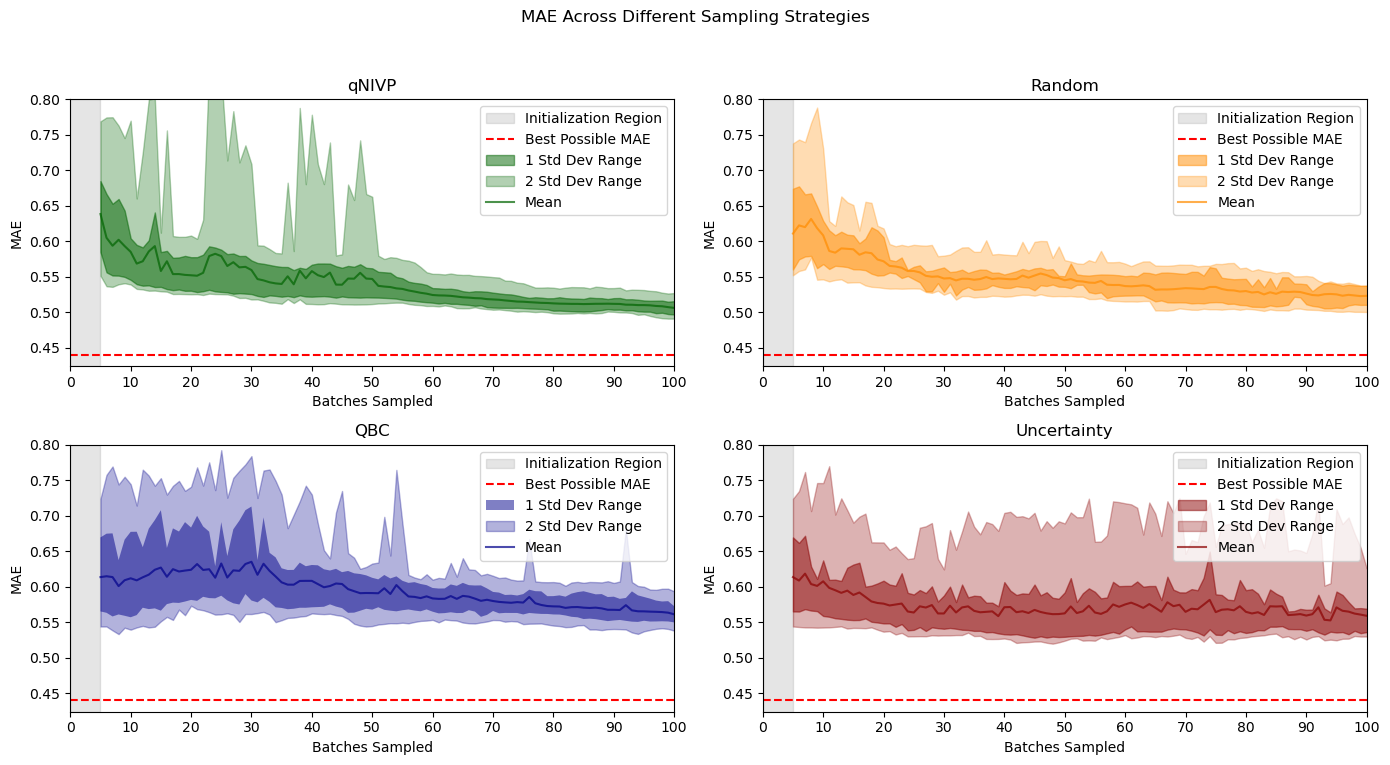

In [112]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.44, color='r', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.4, 1.0])
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Batches Sampled')
    
    

#set the xlim and ylim for all subplots
for ax in axs.flat:
    ax.set_xlim([0, 100])
    ax.set_ylim([0.424, 0.8])

#increment the xticks by 10
for ax in axs.flat:
    ax.set_xticks(np.arange(0, 101, 10))

# First subplot: qNIVP
axs[0, 0].fill_between(nmr_percent, np.percentile(nmr_qnipv_runs,15.9,axis=0),np.percentile(nmr_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(nmr_percent,np.percentile(nmr_qnipv_runs,2.3,axis=0),np.percentile(nmr_qnipv_runs,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(nmr_percent, np.mean(nmr_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(nmr_percent,np.percentile(nmr_random_runs,15.9,axis=0),np.percentile(nmr_random_runs,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(nmr_percent, np.percentile(nmr_random_runs,2.3,axis=0),np.percentile(nmr_random_runs,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(nmr_percent, np.mean(nmr_random_runs,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()



axs[1, 0].fill_between(nmr_percent, np.percentile(nmr_qbc_runs, 15.9,axis=0), np.percentile(nmr_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(nmr_percent, np.percentile(nmr_qbc_runs, 2.3, axis=0),np.percentile(nmr_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(nmr_percent, np.mean(nmr_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(nmr_percent, np.percentile(nmr_uncr_runs,15.9,axis=0), np.percentile(nmr_uncr_runs,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(nmr_percent,np.percentile(nmr_uncr_runs,2.3,axis=0), np.percentile(nmr_uncr_runs,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(nmr_percent, np.mean(nmr_uncr_runs,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

### AutoAM Dataset

In [105]:
len(am_percent)

69

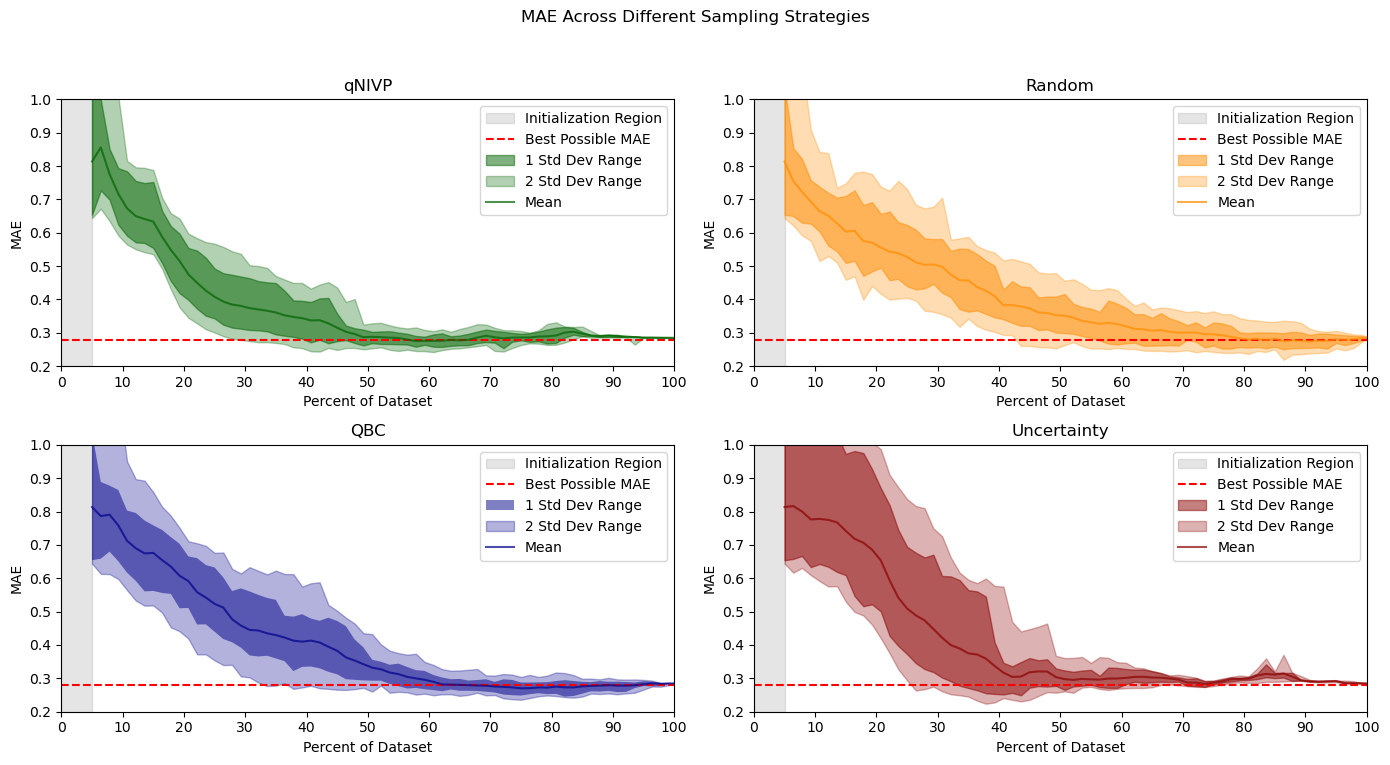

In [111]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.28, color='r', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.2, 1.0])
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Percent of Dataset')
    
    


#increment the xticks by 10
for ax in axs.flat:
    ax.set_xticks(np.arange(0, 101, 10))

# First subplot: qNIVP
axs[0, 0].fill_between(am_percent, np.percentile(am_qnipv_runs,15.9,axis=0),np.percentile(am_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(am_percent,np.percentile(am_qnipv_runs,2.3,axis=0),np.percentile(am_qnipv_runs,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(am_percent, np.mean(am_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(am_percent,np.percentile(am_random_runs,15.9,axis=0),np.percentile(am_random_runs,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(am_percent, np.percentile(am_random_runs,2.3,axis=0),np.percentile(am_random_runs,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(am_percent, np.mean(am_random_runs,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()


# Third subplot: QBC
axs[1, 0].fill_between(am_percent, np.percentile(am_qbc_runs, 15.9,axis=0), np.percentile(am_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(am_percent, np.percentile(am_qbc_runs, 2.3, axis=0),np.percentile(am_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(am_percent, np.mean(am_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(am_percent, np.percentile(am_unc_runs,15.9,axis=0), np.percentile(am_unc_runs,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(am_percent,np.percentile(am_unc_runs,2.3,axis=0), np.percentile(am_unc_runs,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(am_percent, np.mean(am_unc_runs,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

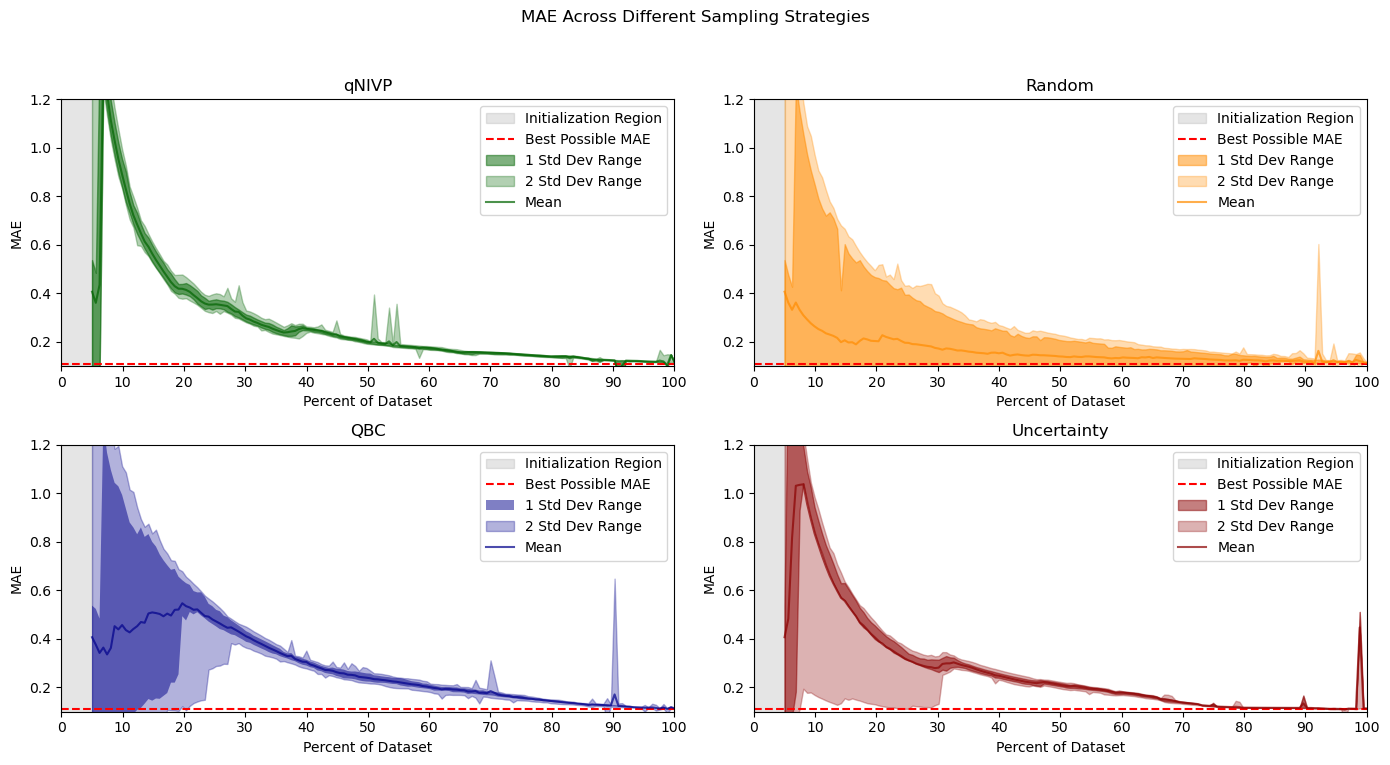

In [117]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('MAE Across Different Sampling Strategies')
    
for ax in axs.flat:
    ax.axvspan(0, 5, color='gray', alpha=0.2, label='Initialization Region')
    
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    ax.axhline(y=0.11, color='r', linestyle='--', label='Best Possible MAE')
    # ax.axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
    # ax.axvline(x=5, color='r', linestyle='--', label='Initialize w/ 5%')
    ax.set_xlim([0, 100])
    ax.set_ylim([0.1, 1.2])
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Percent of Dataset')
    
    


#increment the xticks by 10
for ax in axs.flat:
    ax.set_xticks(np.arange(0, 101, 10))

# First subplot: qNIVP
axs[0, 0].fill_between(thermo_percent, np.percentile(thermo_qnipv_runs,15.9,axis=0),np.percentile(thermo_qnipv_runs,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
# axs[0,0].axhline(y=0.48, color='k', linestyle='--', label='Best MAE')
axs[0, 0].fill_between(thermo_percent,np.percentile(thermo_qnipv_runs,2.3,axis=0),np.percentile(thermo_qnipv_runs,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0, 0].plot(thermo_percent, np.mean(thermo_qnipv_runs,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0, 0].set_title('qNIVP')
# axs[0, 0].set_xlabel('Percent of Dataset')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()

# Second subplot: Random
axs[0, 1].fill_between(thermo_percent,np.percentile(thermo_random,15.9,axis=0),np.percentile(thermo_random,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[0, 1].fill_between(thermo_percent, np.percentile(thermo_random,2.3,axis=0),np.percentile(thermo_random,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[0,1].plot(thermo_percent, np.mean(thermo_random,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[0, 1].set_title('Random')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()


# Third subplot: QBC
axs[1, 0].fill_between(thermo_percent, np.percentile(thermo_qbc_runs, 15.9,axis=0), np.percentile(thermo_qbc_runs, 84.1,axis=0), color='darkblue', alpha=0.5, label='1 Std Dev Range',ec = 'none')
axs[1, 0].fill_between(thermo_percent, np.percentile(thermo_qbc_runs, 2.3, axis=0),np.percentile(thermo_qbc_runs,97.7,axis =0),ec = 'none', color='darkblue', alpha=0.3, label='2 Std Dev Range')
axs[1,0].plot(thermo_percent, np.mean(thermo_qbc_runs,axis=0),color='darkblue',alpha=0.7, label='Mean')
axs[1, 0].set_title('QBC')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()



# Fourth subplot: Uncertainty
axs[1, 1].fill_between(thermo_percent, np.percentile(thermo_uncertainty,15.9,axis=0), np.percentile(thermo_uncertainty,84.1,axis=0), ec='none',color='darkred', alpha=0.5, label='1 Std Dev Range')
axs[1, 1].fill_between(thermo_percent,np.percentile(thermo_uncertainty,2.3,axis=0), np.percentile(thermo_uncertainty,97.7,axis=0), ec='none',color='darkred', alpha=0.3, label='2 Std Dev Range')
axs[1, 1].plot(thermo_percent, np.mean(thermo_uncertainty,axis=0), color='darkred',alpha=0.7, label='Mean')
axs[1, 1].set_title('Uncertainty')
# axs[1, 1].set_xlabel('Percent of Dataset')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make room for the main title
plt.show()

In [118]:
logei_am = np.load('../results/logei_autoAM_qnipv_vs_logei_30percent.npy')
qnipv_am = np.load('../results/qnipv_autoAM_qnipv_vs_logei_30percent.npy')

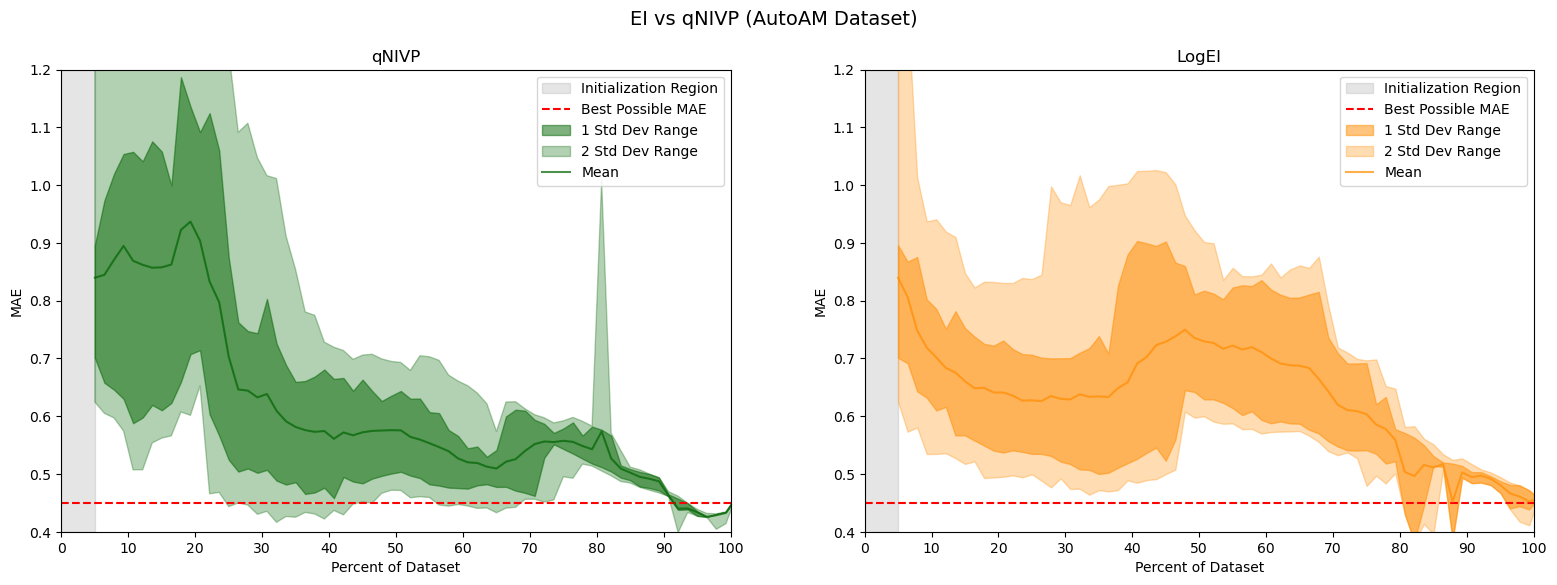

In [125]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 6))
fig.suptitle('EI vs qNIVP (AutoAM Dataset)', size=14)

# Plot a horizontal line at y=0.28 for all subplots
# for ax in axs.flat:
#     ax.axhline(y=0.51, color='k', linestyle='--', label='Best MAE')
    
for ax in axs.flat:
    # Highlight initialization region (0-5%)
    ax.axvspan(0, 5, color='gray', alpha=0.2,label='Initialization Region')
    # label='Initialization Region'
    # You can add more regions if needed:
    # ax.axvspan(50, 60, color='yellow', alpha=0.1, label='Region of Interest')
    
    ax.axhline(y=0.45, color='r', linestyle='--', label='Best Possible MAE')
    # label='Initialize w/ 5%'
    ax.set_xlim([0, 100])
    ax.set_ylim([0.4, 1.2])
    ax.set_xticks(np.arange(0, 101, 10))
    


# First subplot: qNIVP
axs[0].fill_between(am_percent, np.percentile(qnipv_am,15.9,axis=0),np.percentile(qnipv_am,84.1,axis=0) , ec='none',color='darkgreen', alpha=0.5, label='1 Std Dev Range')
axs[0].fill_between(am_percent,np.percentile(qnipv_am,2.3,axis=0),np.percentile(qnipv_am,97.7,axis=0) , ec='none',color='darkgreen', alpha=0.3, label='2 Std Dev Range')
axs[0].plot(am_percent, np.mean(qnipv_am,axis=0), color='darkgreen',alpha=0.7, label='Mean')
axs[0].set_title('qNIVP')
axs[0].set_xlabel('Percent of Dataset')
axs[0].set_ylabel('MAE')
axs[0].legend()

# Second subplot: EI
axs[1].fill_between(am_percent,np.percentile(logei_am,15.9,axis=0),np.percentile(logei_am,84.1,axis=0), ec='none',color='darkorange', alpha=0.5, label='1 Std Dev Range')
axs[1].fill_between(am_percent, np.percentile(logei_am,2.3,axis=0),np.percentile(logei_am,97.7,axis=0), ec='none',color='darkorange', alpha=0.3, label='2 Std Dev Range')
axs[1].plot(am_percent, np.mean(logei_am,axis=0), color='darkorange',alpha=0.7, label='Mean')
axs[1].set_title('LogEI')
axs[1].set_xlabel('Percent of Dataset')
axs[1].set_ylabel('MAE')
axs[1].legend()